### Loading Libraries

In [1]:
import pandas as pd #data processing
import seaborn as sns #data visulaization
import numpy as np # Linear algebra
import matplotlib.pyplot as plt
import time
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler # Standardization
from sklearn.preprocessing import LabelEncoder # Label Encoding

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
data = pd.read_csv("/content/drive/MyDrive/Project/data.csv")

### Separate Target from Features

In [101]:
y=data.diagnosis
y
drop_cols=['id','diagnosis','Unnamed: 32']
x=data.drop(drop_cols,axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Checking Null Values

In [102]:
x.isnull().any().sum()

0

In [103]:
data.dropna(axis=1,inplace=True)

### Target Distribution

Number of Benign Tumors: 357
Number of Malignant Tumors: 212


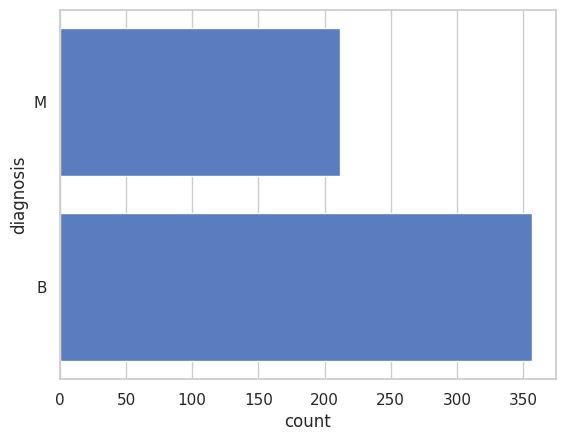

In [104]:
ax=sns.countplot(y,label="count")
B,M = y.value_counts()
B , M =y.value_counts()
print("Number of Benign Tumors:",B)
print("Number of Malignant Tumors:",M)

### Feature Distribution

In [105]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Exploratory Data Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

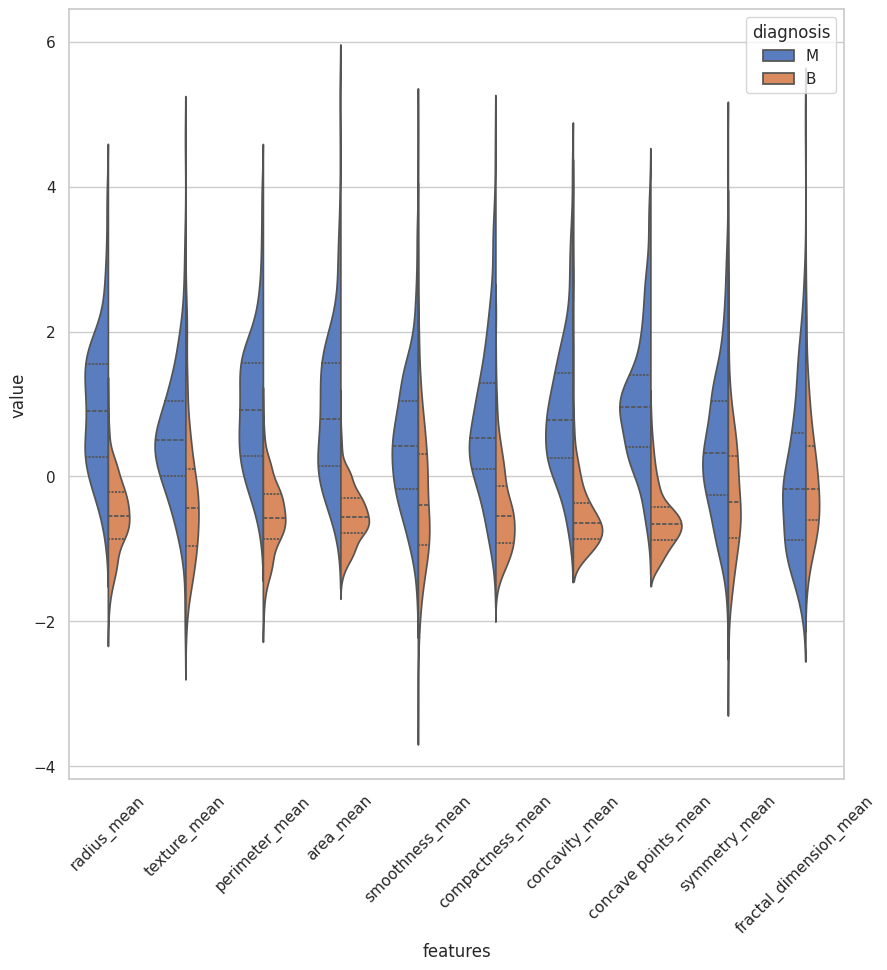

In [106]:
data = x
data_std =(data - data.mean())/data.std()
# We can create 3 groups each group has 10 features. Selecting subset of 10 features
data = pd.concat([y , data_std.iloc[:,0:10]],axis=1)
# unpivot dataframe from long format to wide format
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
data.head()
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
#Feature names rotated by 45deg
plt.xticks(rotation=45)

<font size="3.5" color='#81B6DB'> **Insights : If we look at the feature texture_mean, the median looks separated, it can provide better information for classification. However, median of fractal_dimension it is not separated and it seems to be not a good feature for classification**</font>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

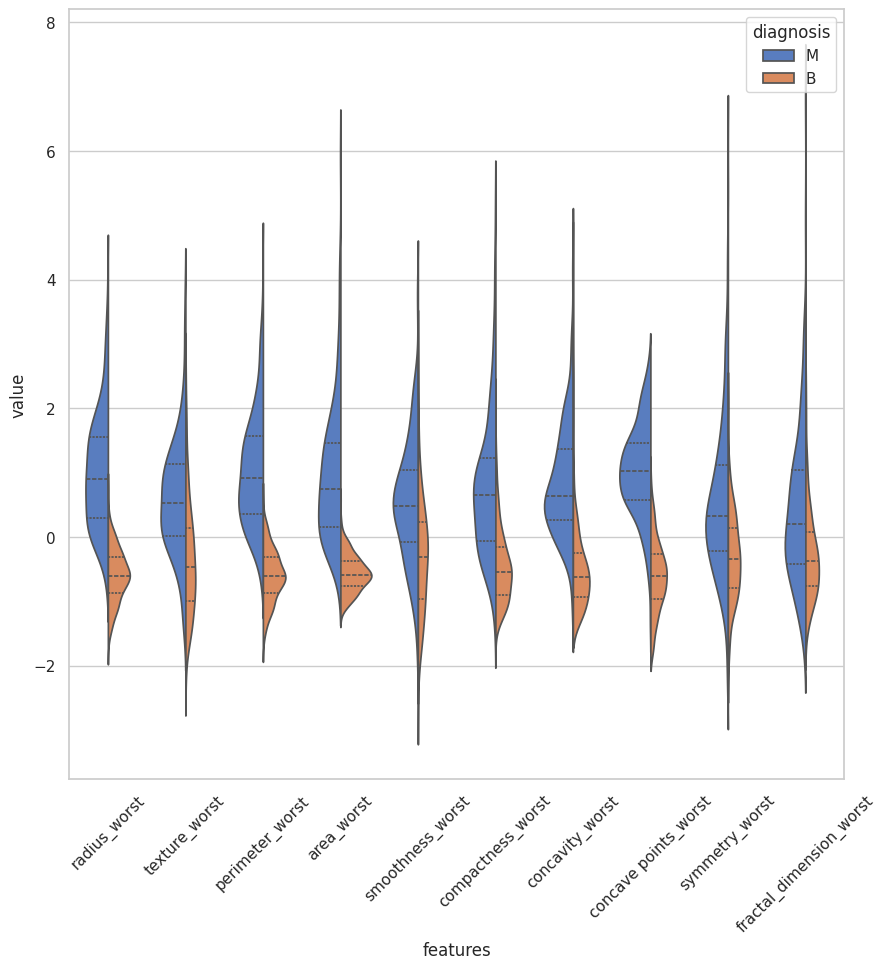

In [107]:
data = pd.concat([y , data_std.iloc[:,20:30]],axis=1)
# unpivot dataframe from long format to wide format
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
#Feature names rotated by 45deg
plt.xticks(rotation=45)

<font size="3.5" color='#81B6DB'>**Insights : It looks like Concavity_Worst and Concave points_worst looks similar. They might be correlated.**</font>

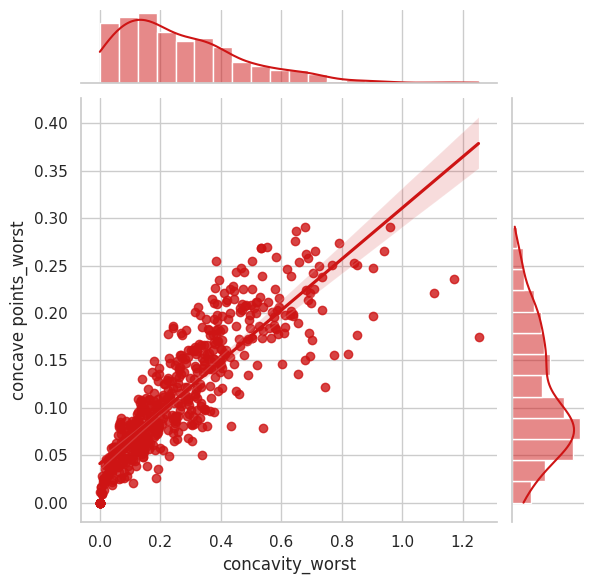

In [108]:
sns.jointplot(x=x.loc[:,'concavity_worst'],
             y=x.loc[:,'concave points_worst'],
             kind='reg',
             color='#ce1414')

<font size="3.5" color='#81B6DB'> **Insights : From the above plot we can analyze Concavity Worst and Concavity Points_worst looks similar and seems highly correlated.**</font>

### Observing the distribution of values and their variance with Swarm Plots
#### To display each data point on the plot. Represents separability of data points and underlying distribution

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

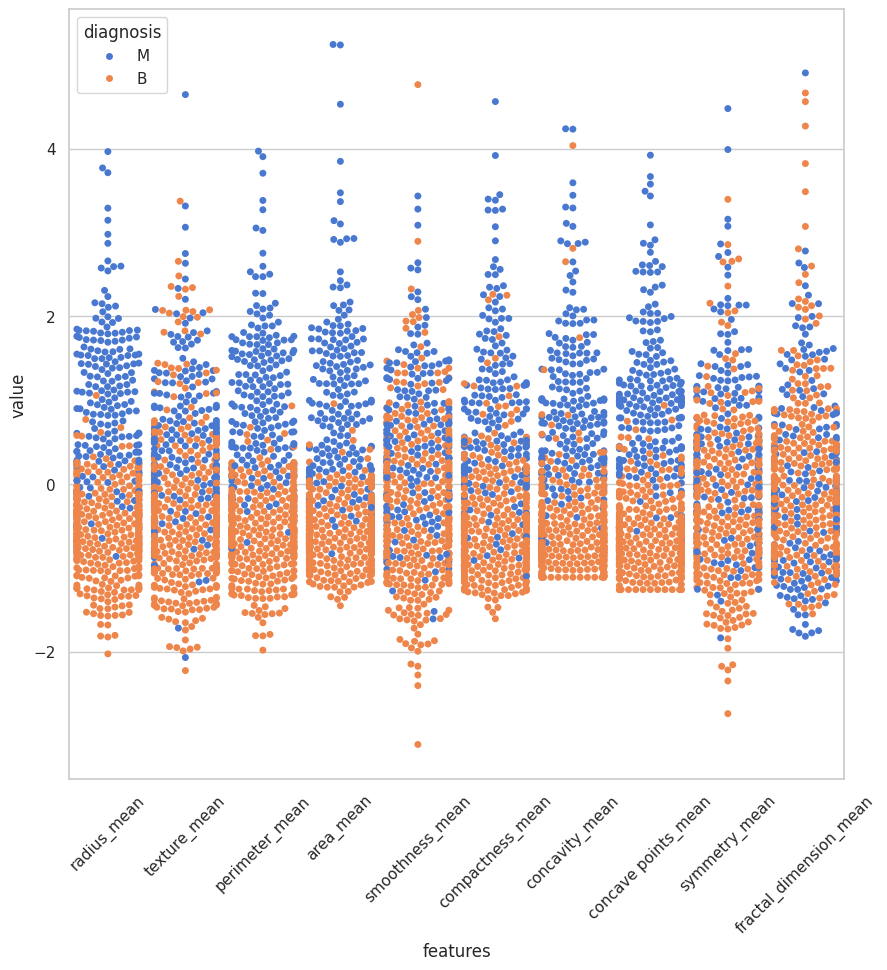

In [109]:
import warnings
warnings.filterwarnings(action= 'ignore')

sns.set(style='whitegrid',palette='muted') #Palette muted dull the colors
data = x
data_std =(data - data.mean())/data.std()
# We can create 3 groups each group has 10 features. Selecting subset of 10 features
data = pd.concat([y , data_std.iloc[:,0:10]],axis=1)
# unpivot dataframe from long format to wide format
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
data.head()
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
#Feature names rotated by 45deg
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

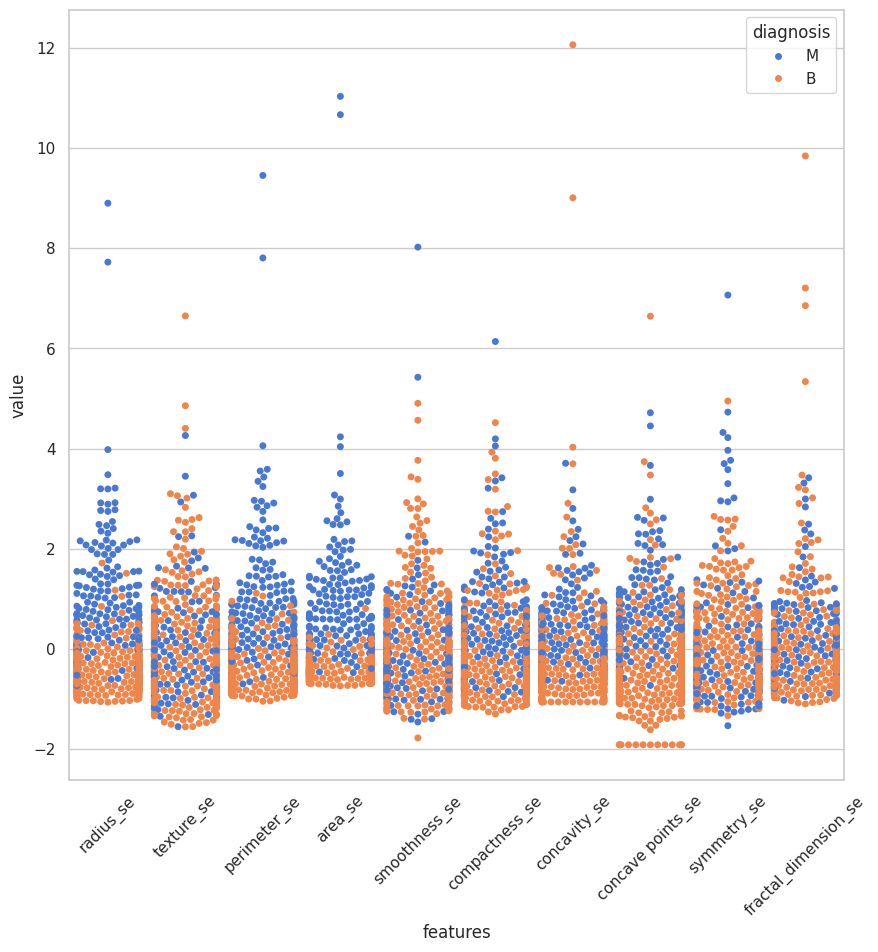

In [110]:
sns.set(style='whitegrid',palette='muted') #Palette muted dull the colors
data = x
data_std =(data - data.mean())/data.std()
# We can create 3 groups each group has 10 features. Selecting subset of 10 features
data = pd.concat([y , data_std.iloc[:,10:20]],axis=1)
# unpivot dataframe from long format to wide format
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
#Feature names rotated by 45deg
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

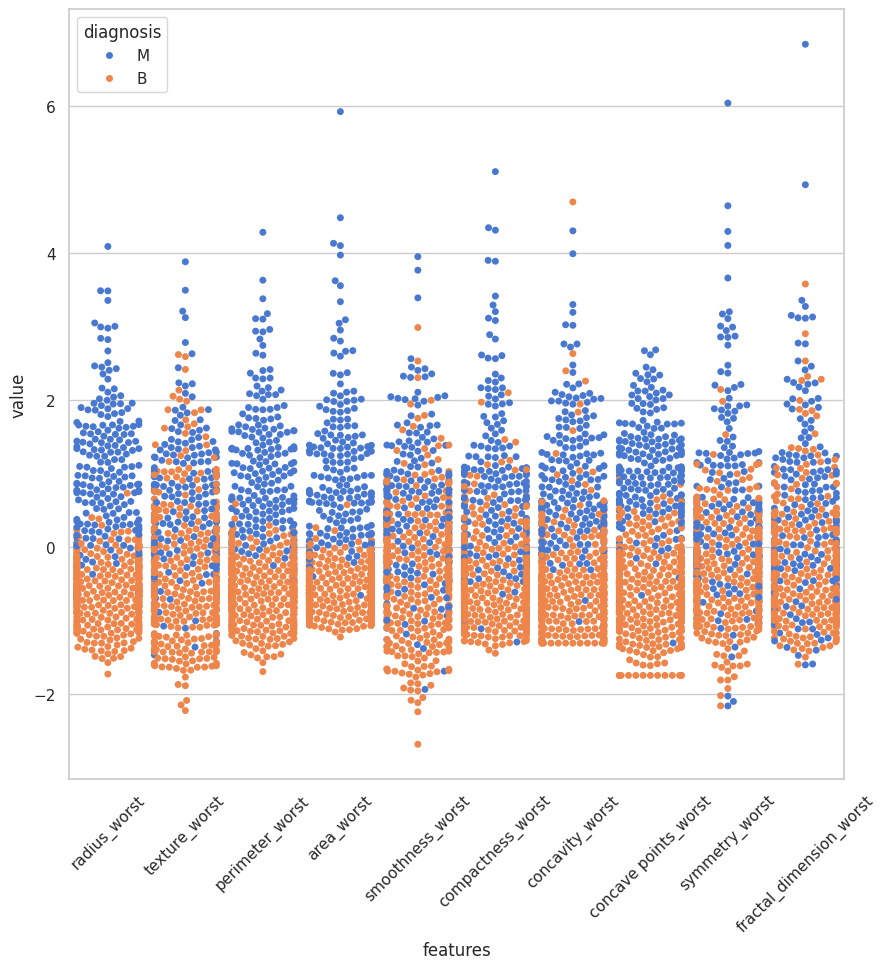

In [111]:
sns.set(style='whitegrid',palette='muted') #Palette muted dull the colors
data = x
data_std =(data - data.mean())/data.std()
# We can create 3 groups each group has 10 features. Selecting subset of 10 features
data = pd.concat([y , data_std.iloc[:,20:30]],axis=1)
# unpivot dataframe from long format to wide format
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
#Feature names rotated by 45deg
plt.xticks(rotation=45)

### Correlation Plot

<Axes: >

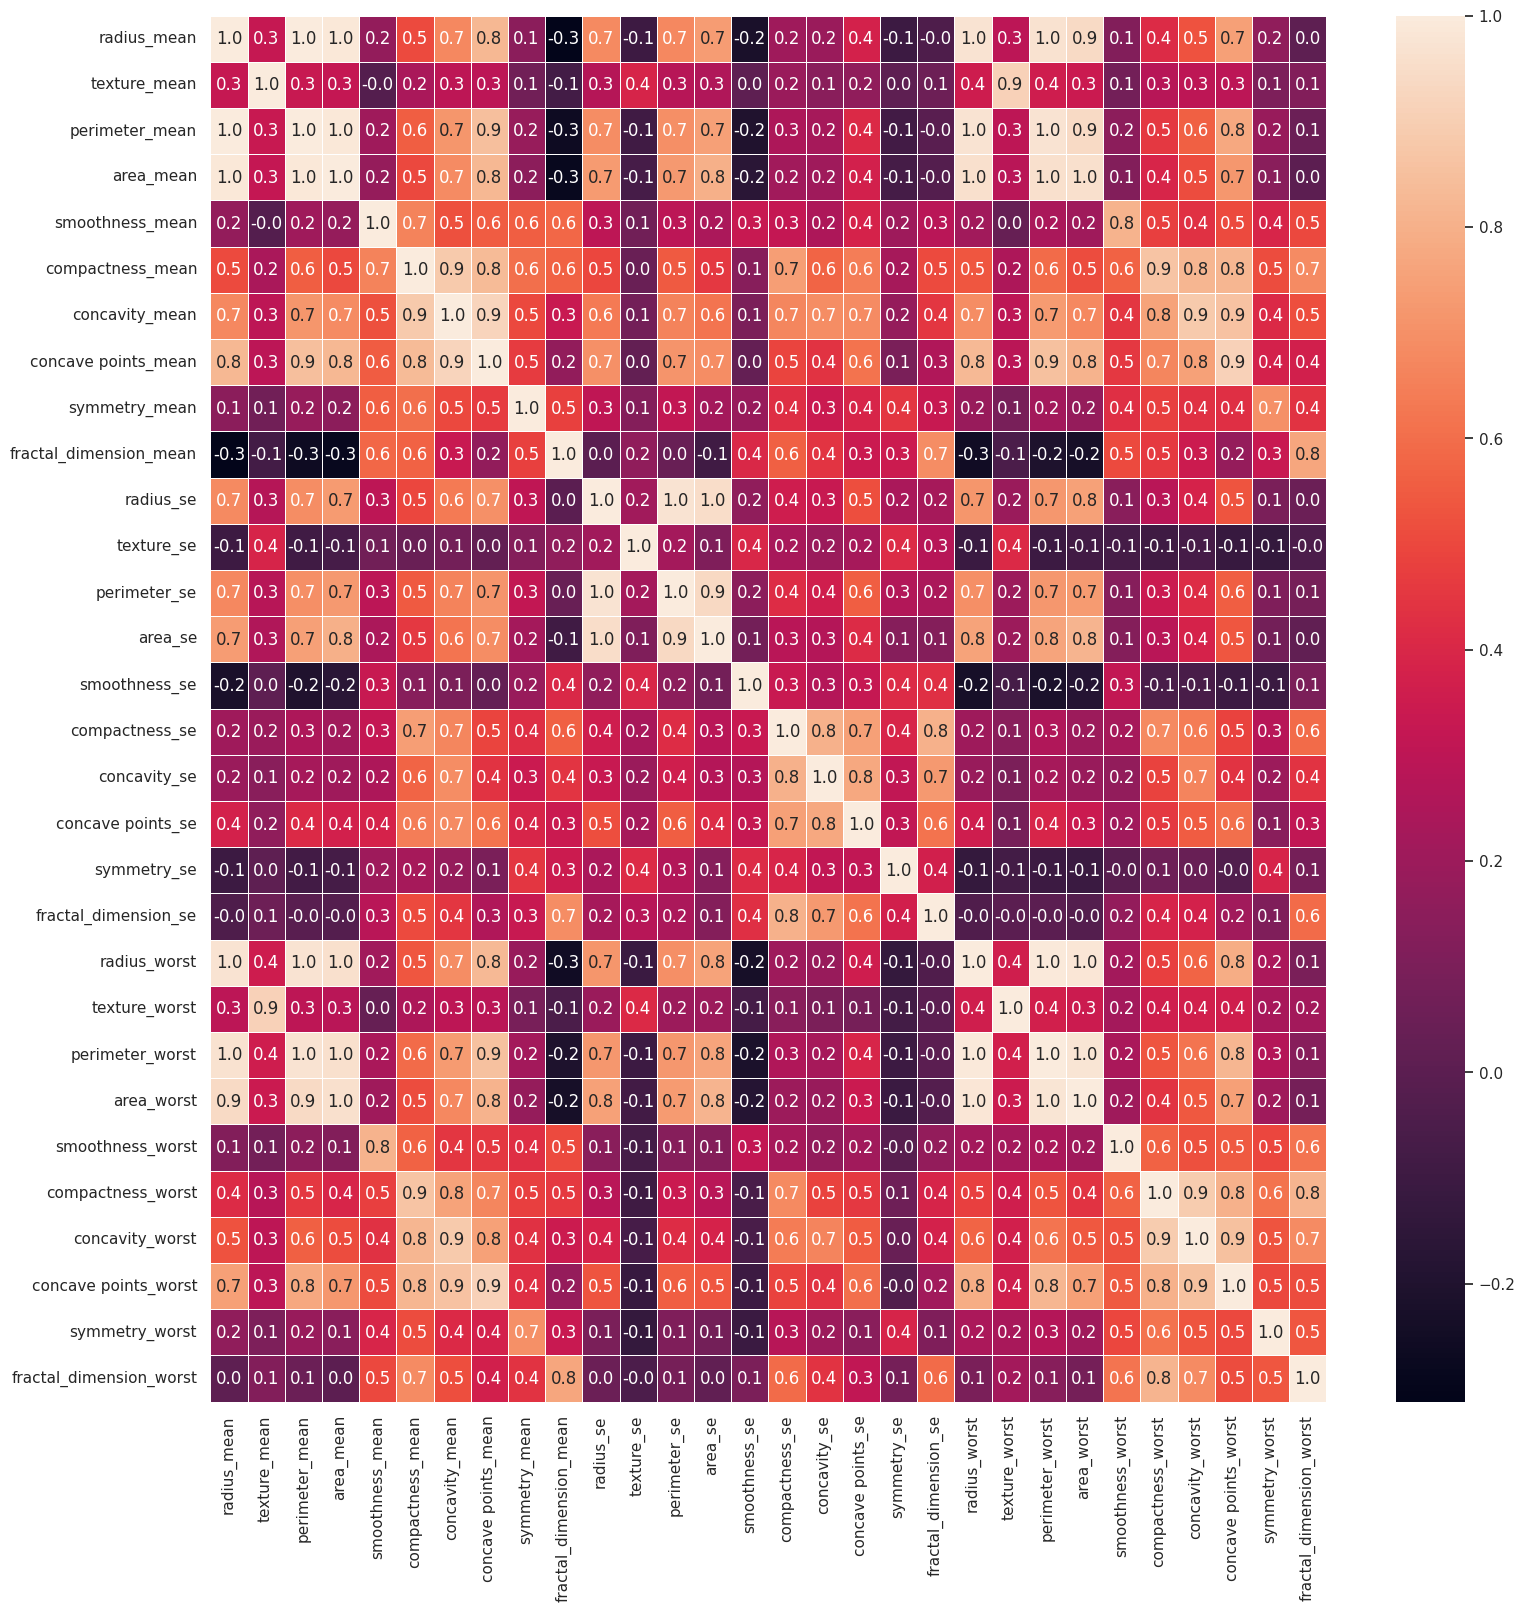

In [112]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(),annot=True,linewidths=0.5,fmt= '.1f',ax=ax)

### Label encoding

In [113]:
#Encoding categorical data values
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### Feature Selection techniques

1. Dropping highly correlated features
2. Univariate Feature Selection

#### 1. Dropping highly correlated features(Features which has value 1 in the above correlation plot)  from the feature matrix

In [114]:
drop_cols= ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']

df = x.drop(drop_cols,axis=1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


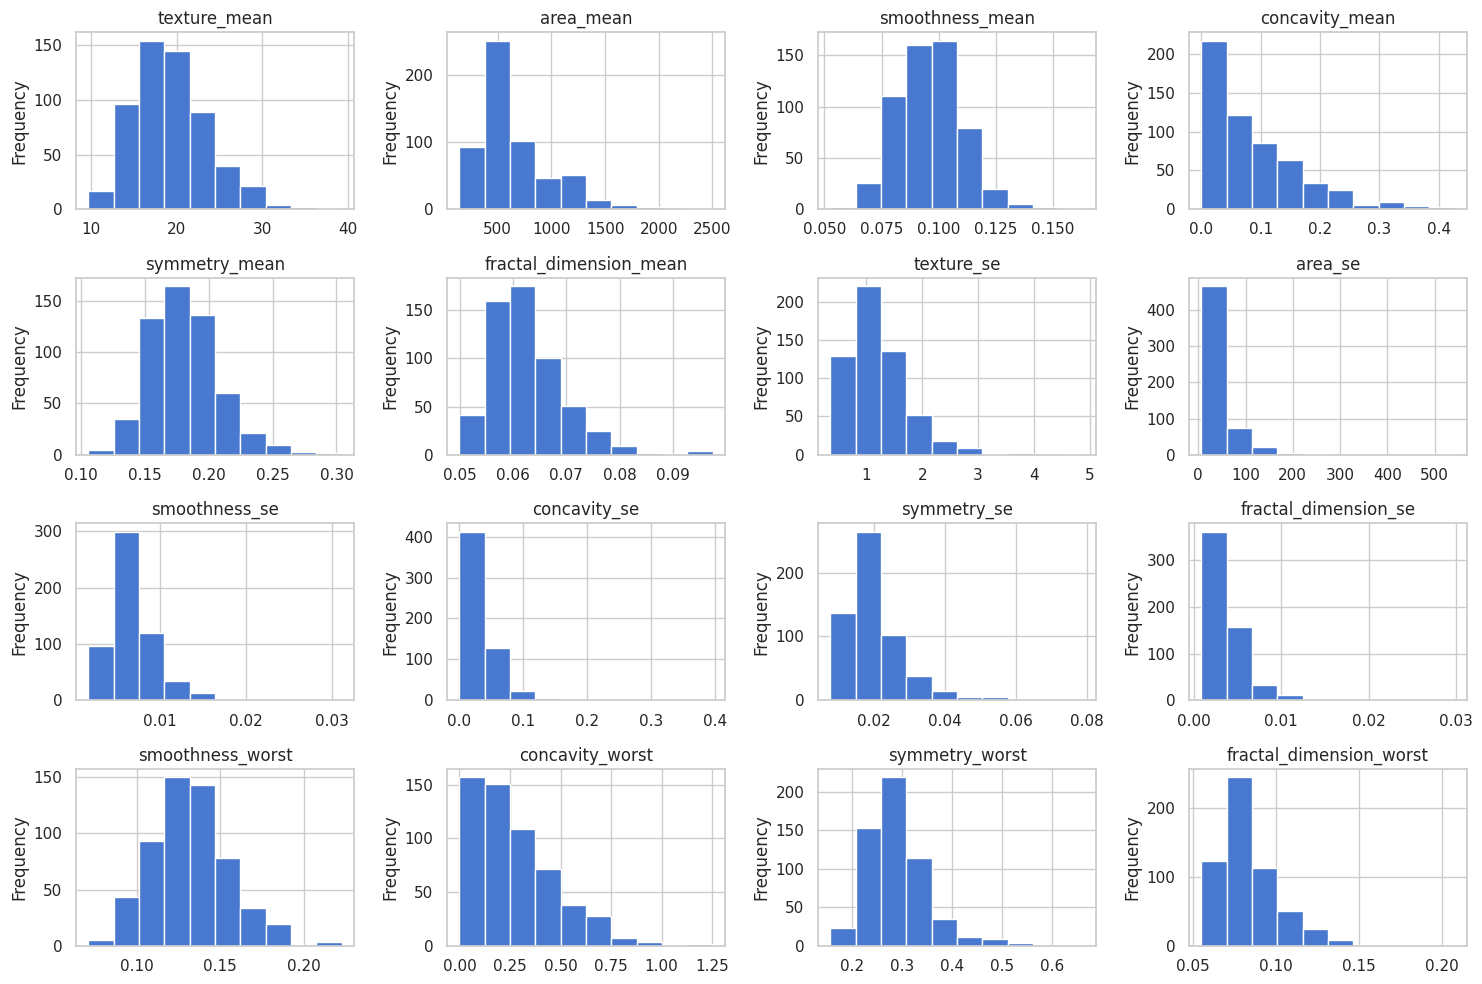

In [115]:
# prompt: Using dataframe df: suggest all plot side by side

import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
axes = axes.flatten() # Convert 2D array of axes to 1D

# Select features to plot
features = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
           'smoothness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Iterate through the features and create histograms
for i, feature in enumerate(features):
    df[feature].plot(kind='hist', ax=axes[i], title=feature)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


<Axes: >

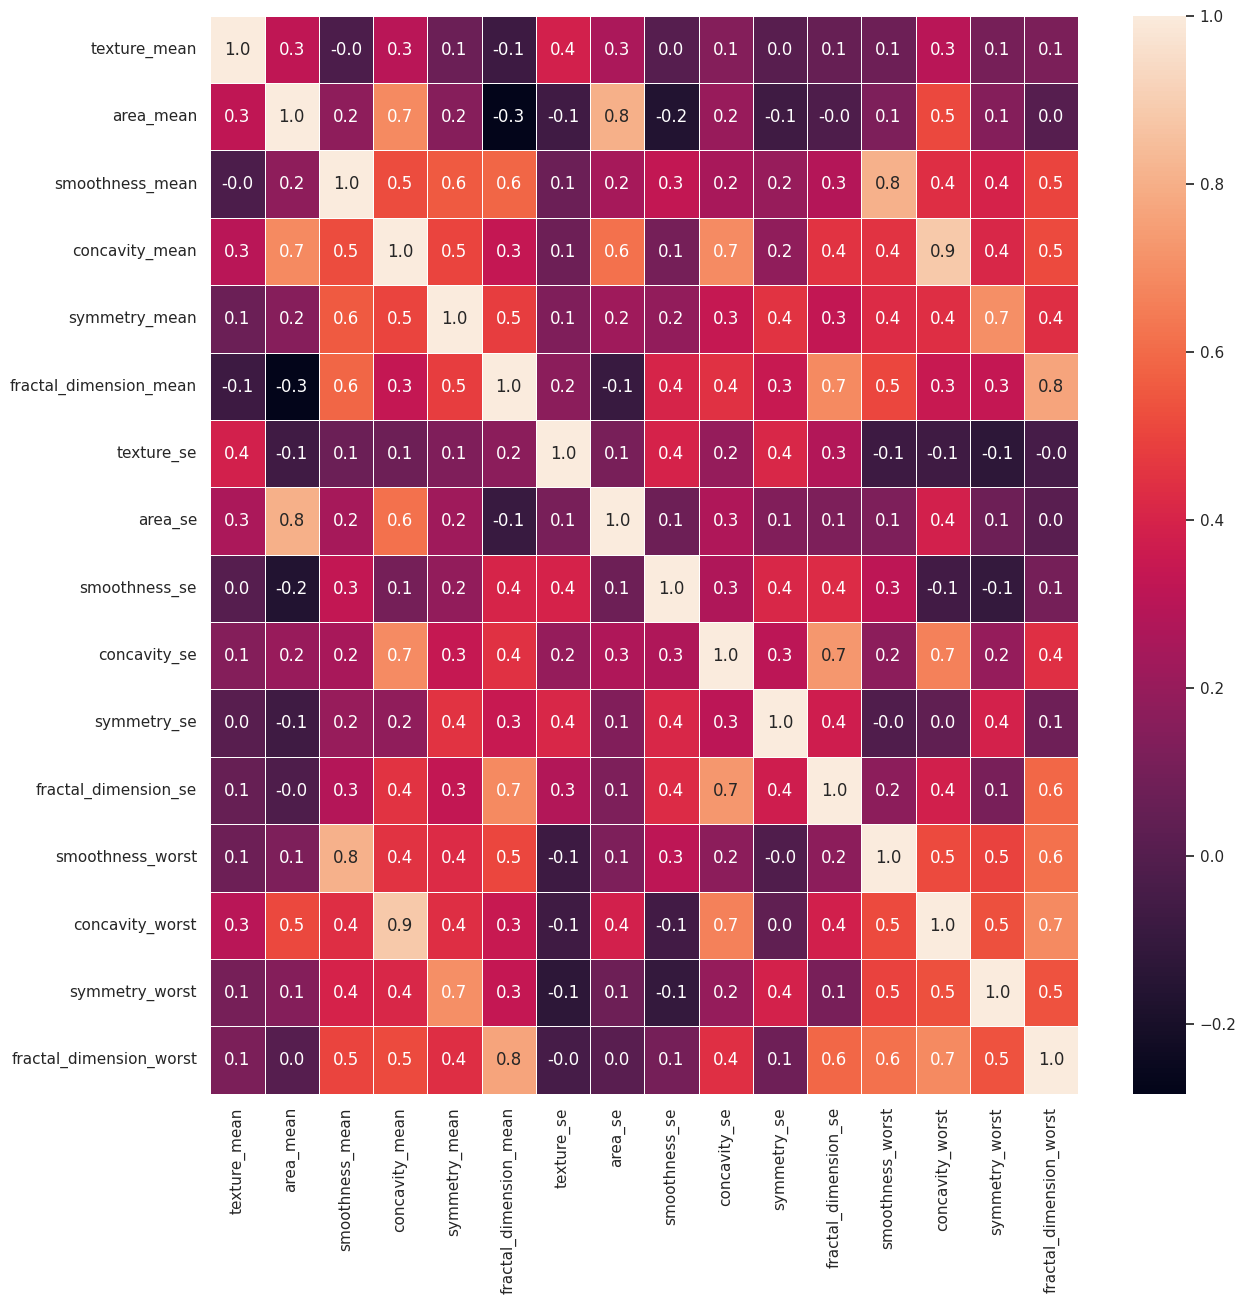

In [116]:
f, ax= plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt= '.1f',ax=ax)

### Splitting the data into training set and testset

In [117]:
from sklearn.model_selection import train_test_split
## conda install -c conda-forge xgboost >> run the command in anaconda
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(df,y, test_size = 0.3, random_state = 42)
print("Size of training set:", x_train.shape) # Changed X_train to x_train
print("Size of training set:", x_test.shape)  # Changed X_test to x_test

Size of training set: (398, 16)
Size of training set: (171, 16)


#### 2. Univariate Feature Selection

In [118]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10).fit(x_train,y_train)

dfscores = pd.DataFrame(bestfeatures.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature_Selection','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
print("\n Score List: ",bestfeatures.scores_)

          Feature_Selection         Score
1                 area_mean  36689.955660
7                   area_se   6127.410670
0              texture_mean     60.691643
13          concavity_worst     25.885812
3            concavity_mean     13.054765
14           symmetry_worst      1.006351
9              concavity_se      0.692897
12         smoothness_worst      0.263226
4             symmetry_mean      0.195983
15  fractal_dimension_worst      0.123087

 Score List:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]


<font size="4" color='Blue'> **Model Prediction** </font>

### Classification using XGBoost(minimal Feature Selection)
#### Using correlation Plot - Base line model

Accuracy is 0.9824561403508771


<Axes: >

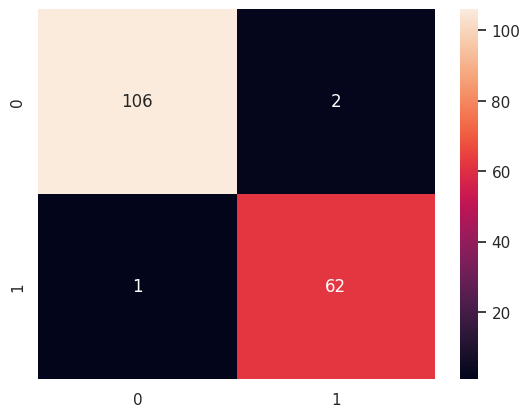

In [119]:
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.fit_transform(x_test)

clf_1 = xgb.XGBClassifier(random_state=40,eval_metric='mlogloss')
clf_1 = clf_1.fit(x_train1,y_train)

print('Accuracy is',accuracy_score(y_test,clf_1.predict(x_test1)))
cm1 = confusion_matrix(y_test,clf_1.predict(x_test1))
sns.heatmap(cm1,annot=True,fmt='g')

### XGBoost using univariate feature selection
#### Selecting Top 10 features

After selecting best 10 features: (398, 10)
Accuracy is 0.9766081871345029


<Axes: >

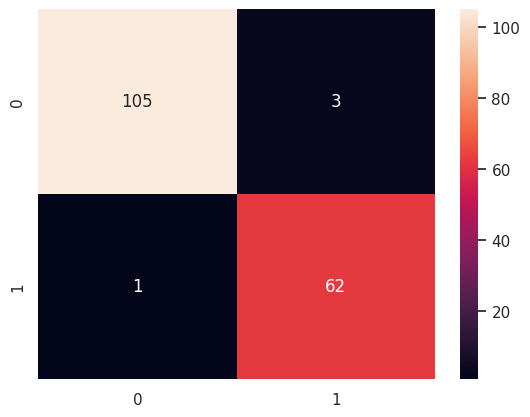

In [120]:
# Creating new feature set
# bestfeatures.transform selects top 10 features

x_train2 = bestfeatures.transform(x_train)
x_test2 = bestfeatures.transform(x_test)

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.fit_transform(x_test2)

print("After selecting best 10 features:", x_train2.shape)

clf_2 = xgb.XGBClassifier(random=42,eval_metric='mlogloss').fit(x_train2,y_train)
print('Accuracy is',accuracy_score(y_test,clf_2.predict(x_test2)))

cm2 = confusion_matrix(y_test,clf_2.predict(x_test2))
sns.heatmap(cm2,annot=True,fmt='d')

### Recursive Feature Elimination with cross validation
#### The model tells us the number of optimal features no need to explicitly mention

In [121]:
from sklearn.feature_selection import RFECV

clf_3 = xgb.XGBClassifier(eval_metric='logloss')
rfecv = RFECV(estimator=clf_3, step=1, cv=5, scoring='accuracy',n_jobs=-1).fit(x_train,y_train)

print("Original Features :",x_train.columns)
print('\n Optimal number of features:',rfecv.n_features_)
print('\n Best Features:',x_train.columns[rfecv.support_])

Original Features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

 Optimal number of features: 15

 Best Features: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


Accuracy is: 0.9707602339181286


[Text(0.5, 0, 'No of selected features'), Text(0, 0.5, 'CV scores')]

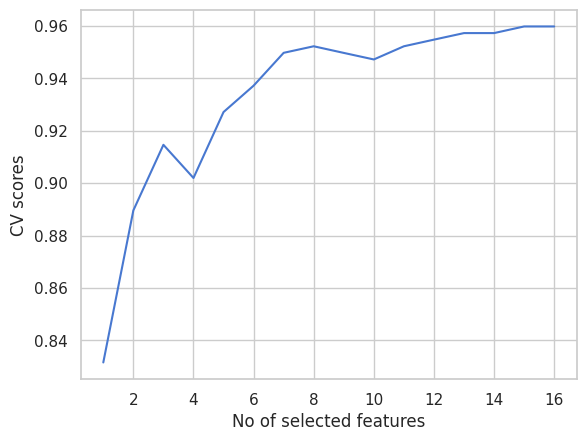

In [122]:
print('Accuracy is:',accuracy_score(y_test,rfecv.predict(x_test)))
# Access cv_results_ instead of grid_scores_ and extract the mean test scores
num_features = [i for i in range(1, len(rfecv.cv_results_['mean_test_score']) + 1)]
cv_scores = rfecv.cv_results_['mean_test_score']
ax = sns.lineplot(x=num_features, y=cv_scores)
ax.set(xlabel='No of selected features', ylabel='CV scores')

<font size="3.5" color='#81B6DB'> **Insights : We can anlayze from the above graph that with the increase number of features, the cross validation accuracy also increases and peaks at 14.**</font>

### Logistic Regression using univariate Feature Selection

In [123]:
# Logistic Regression
# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets
logreg.fit(x_train2, y_train)

LogisticRegression()

In [124]:
# Prediction on test data
prediction = logreg.predict(x_test2)

In [125]:
# Calculating the accuracy
print('Accuracy of Logistic Regression model : ', round(accuracy_score(y_test, prediction) * 100,2))

Accuracy of Logistic Regression model :  98.25


[[108   0]
 [  3  60]]


<Axes: >

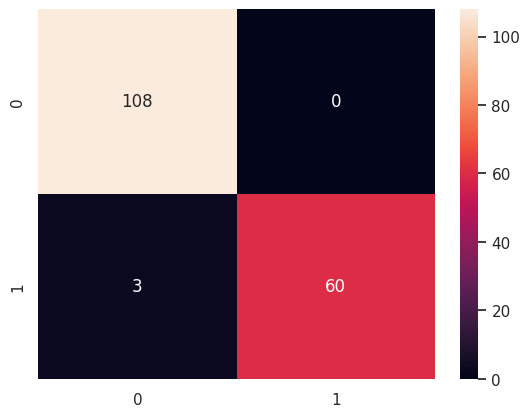

In [126]:
# Confusion Matrix
cm4 = confusion_matrix(y_test,prediction)
print(cm4)
sns.heatmap(cm4,annot=True,fmt='g')

### Decision Trees using univariate Feature Selection

Accuracy of Decision tree :  91.81


<Axes: >

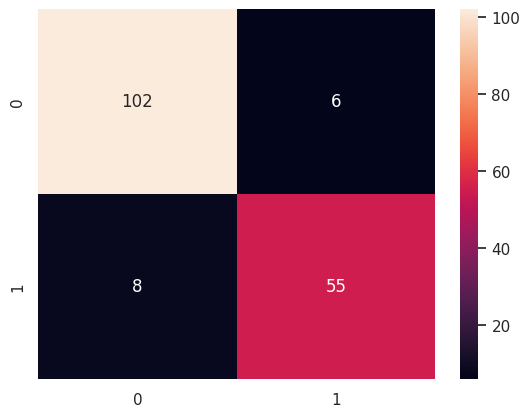

In [127]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train2, y_train)

y_pred = classifier.predict(x_test2)
print('Accuracy of Decision tree : ', round(accuracy_score(y_test, y_pred) * 100,2))
cm5 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm5,annot=True,fmt='g')

### Random Forest using univariate Feature Selection

Accuracy of Random Forest :  96.49


<Axes: >

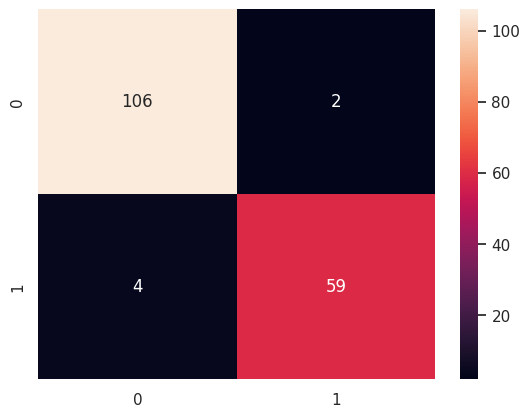

In [128]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train2, y_train)

y_pred1 = classifier.predict(x_test2)
print('Accuracy of Random Forest : ', round(accuracy_score(y_test, y_pred1) * 100,2))
cm6 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm6,annot=True,fmt='g')

### Feature Extraction using Dimensionality Reduction - PCA

In [129]:
x_trainpca, x_testpca, y_trainpca, y_testpca = train_test_split(x , y, test_size=0.3, random_state=42)
sc = StandardScaler()
x_train_norm = (x_trainpca - x_trainpca.mean())/ (x_trainpca.max() - x_trainpca.min())
x_test_norm = (x_testpca - x_testpca.mean())/ (x_testpca.max() - x_testpca.min())

Text(0, 0.5, 'cumulative explaines variance')

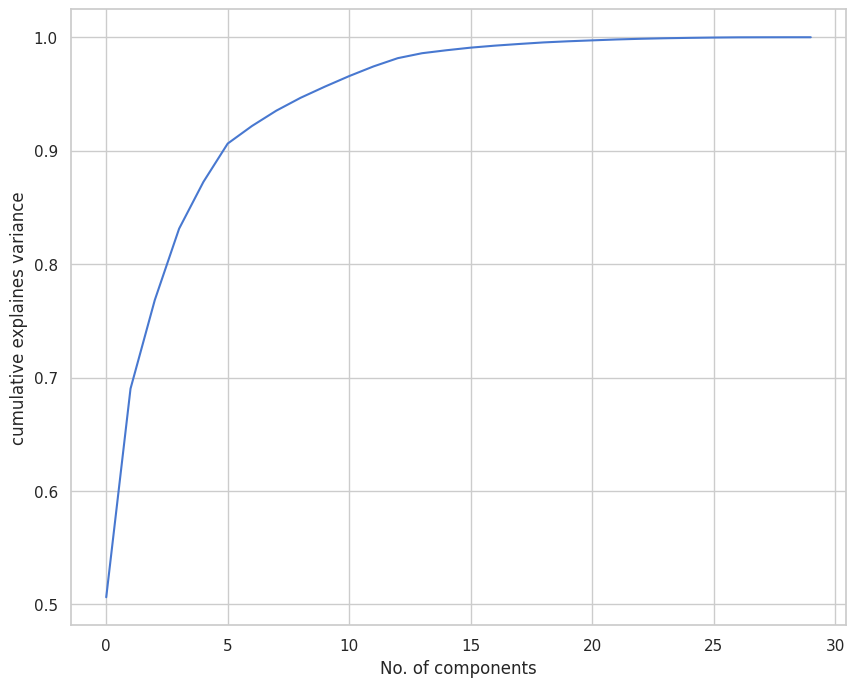

In [130]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_norm)
plt.figure(1, figsize=(10,8))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('cumulative explaines variance')

<font size="3.5" color='#81B6DB'> **Insights : x axis represents the number of features in the dataset, yaxis represents the number of cumulative variance explained by the model with the number of features selected. If we want the model that explains 99% variance in the data, we can stop at 14 features which would be optimal.**</font>

In [131]:
print("Accuracy of XGBoost:",round(accuracy_score(y_test,clf_2.predict(x_test2))*100,2),'%')
print('Accuracy of Cross Validation:',round(accuracy_score(y_test,rfecv.predict(x_test))*100,2),'%')
print('Accuracy of Logistic Regression:', round(accuracy_score(y_test, prediction) * 100,2),'%')
print('Accuracy of Decision tree : ', round(accuracy_score(y_test, y_pred) * 100,2),'%')
print('Accuracy of Random Forest: ', round(accuracy_score(y_test, y_pred1) * 100,2),'%')

Accuracy of XGBoost: 97.66 %
Accuracy of Cross Validation: 97.08 %
Accuracy of Logistic Regression: 98.25 %
Accuracy of Decision tree :  91.81 %
Accuracy of Random Forest:  96.49 %


**<font size="3.5" color='#81B6DB'>Logistic Regression and XGBoost can be selected as the best model for the breast cancer dataset. </font>**